In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('placement.csv')

In [24]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Lets plot the data to check the distribution

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


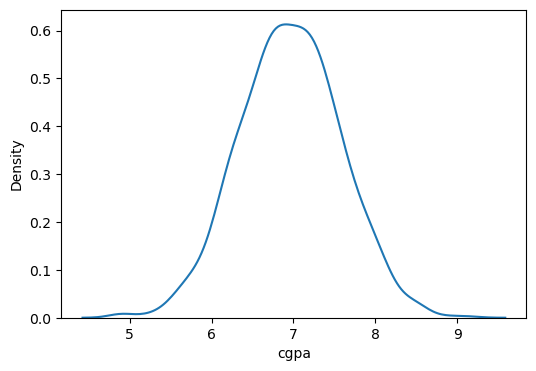

In [25]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['cgpa'])
plt.show()
#Very close to normal distribution

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


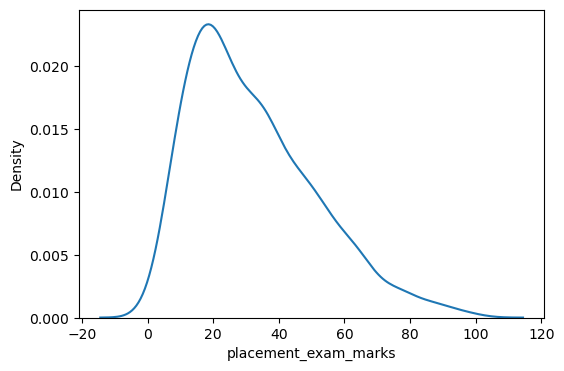

In [26]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['placement_exam_marks'])
plt.show()
#skewed

## Will apply z-score method for CGPA

In [27]:
df['cgpa'].skew()

-0.014529938929314918

In [28]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [29]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [30]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [31]:
df[(df['cgpa_zscore']< -3) | (df['cgpa_zscore'] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


### These are the outliers

# Outlier Treatment

## 1] Trimming

In [32]:
new_df = df[((df['cgpa_zscore']>= -3) & (df['cgpa_zscore'] <= 3))]

In [33]:
new_df.shape

(995, 4)

In [34]:
new_df[(new_df['cgpa_zscore']< -3) | (new_df['cgpa_zscore'] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore


## 2] Capping

In [35]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

### np.where(x,y,z) , x-condition,y-if true

In [36]:
print(df['cgpa'].max(),upper_limit)

9.12 8.808933625397168


In [37]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,upper_limit,df['cgpa'])

In [38]:
df['cgpa'] = np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])

In [39]:
df.shape

(1000, 4)

In [40]:
print(df['cgpa'].max(),upper_limit)

8.808933625397168 8.808933625397168
